<a href="https://colab.research.google.com/github/m-aliabbas/EvolutionaryComputing/blob/master/densenet121PreTrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import fastai
from fastai.vision import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
from zipfile import ZipFile 
def unZip(file_name):
  with ZipFile(file_name, 'r') as zip: 
      zip.extractall() 
      print('Done!') 

In [0]:
!rm -rf chest_xray
!rm -rf dataset1

In [0]:
file_name = '/content/drive/chestXRay.zip'

In [0]:
path="/content/drive/My Drive/"
file_name=path+'chestXRay.zip'

In [8]:
unZip(file_name)

Done!


In [9]:
!ls chest_xray

ls: cannot access 'chest_xray': No such file or directory


In [10]:
!ls

chest_xray.zip	drive  sample_data


In [11]:
unZip('chest_xray.zip')

Done!


In [12]:
!ls chest_xray

test  train  val


In [0]:
import glob
import cv2
import numpy as np
%matplotlib inline
filesPos= sorted(glob.glob('chest_xray/train/NORMAL/*.jpeg'))
filesNeg=sorted(glob.glob('chest_xray/train/PNEUMONIA/*.jpeg'))

In [14]:
print(len(filesPos),len(filesNeg))

1341 3875


In [0]:
from fastai import *
import shutil
def copyfiles(filesName,dest):
  c=0
  for file in filesName:
    shutil.copy(file, dest)
    c+=1
  print("Copied "+str(c))

In [0]:
!mkdir dataset1

In [0]:
!mkdir dataset1/train

In [18]:
!ls dataset1

train


In [0]:
!mkdir dataset1/train/PNEUMONIA
!mkdir dataset1/train/NORMAL

In [20]:
!ls dataset1/train/

NORMAL	PNEUMONIA


In [0]:
filesNeg=filesNeg[:1340]

In [0]:
import random 
random.seed(3000)
random.shuffle(filesNeg)
random.shuffle(filesPos)

In [23]:
!ls chest_xray

test  train  val


In [24]:
copyfiles(filesPos,'dataset1/train/NORMAL')

Copied 1341


In [25]:
copyfiles(filesNeg,'dataset1/train/PNEUMONIA')

Copied 1340


In [0]:
!mkdir dataset1/valid

In [0]:
!mkdir dataset1/test

In [0]:
!cp -r chest_xray/val dataset1/

In [0]:
!cp -r chest_xray/test dataset1/

In [0]:
!rm -rf dataset1/valid

In [0]:
!mv dataset1/val dataset1/valid

In [0]:
np.random.seed(1234)
path='dataset1'
data = ImageDataBunch.from_folder(path,
        ds_tfms=get_transforms(do_flip=True,max_lighting=0.1),
        seed=1234,
        valid_pct=0.2,                          
        size=224,
        num_workers=8,
        bs=32,
        test="test")


In [33]:
data

ImageDataBunch;

Train: LabelList (2657 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: dataset1;

Valid: LabelList (664 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,NORMAL,NORMAL
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1

In [34]:
data.classes

['NORMAL', 'PNEUMONIA']

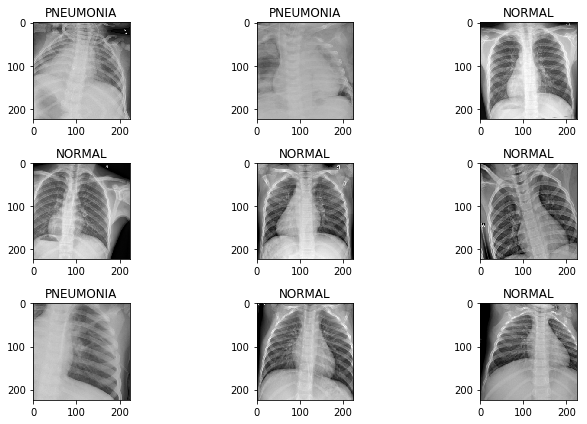

In [35]:
data.show_batch(rows=3, figsize=(10,6), hide_axis=False)

In [0]:
from sklearn.metrics import roc_auc_score,f1_score
def f1_score_a(y_pred,y_true,tens=True):
#     score=roc_auc_score(y_true,torch.sigmoid(y_pred)[:,1])
    f1a_score=f1_score(y_true, np.round(torch.sigmoid(y_pred)[:,1]), average='macro') 
    if tens:
#         score=tensor(score)
        f1a_score=tensor(f1a_score)
    else:
        f1a_score=f1a_score
    return f1a_score
# from sklearn.metrics import f1_score
# def f1_out(y_ture,y_pred,tens=True):
#     f1a_score=f1_score(y_true, torch.sigmoid(y_pred)[:,1], average='macro') 
#     if tens:
#         f1a_score=tensor(f1a_score)
#     else:
#         f1a_score=f1a_score
#     return f1a_score

In [40]:

import torch 
import torchvision
densenet121 = torchvision.models.densenet121(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:01<00:00, 30481315.76it/s]


In [41]:
densenet121

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [0]:
num_ftrs = densenet121.classifier.in_features
densenet121.classifier=nn.Sequential(
    
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 128),
    nn.Dropout(0.3),
    nn.Linear(128, 2),
    
)

In [0]:
densenet121=densenet121.cuda()

In [0]:

auc=[]
loss=[]
aucc=[]
learn = Learner(data, densenet121, metrics=[error_rate, accuracy,f1_score_a])

In [46]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (2657 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: dataset1;

Valid: LabelList (664 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,NORMAL,NORMAL
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _

In [47]:
from fastai.callbacks import *
learn.fit_one_cycle(10,0.0003,callbacks=[SaveModelCallback(learn, every='imrpovement', monitor='f1_score_a')])

/usr/local/lib/python3.6/dist-packages/fastai/callbacks/tracker.py:83: UserWarning: SaveModel every imrpovement is invalid, falling back to "improvement".
  warn(f'SaveModel every {self.every} is invalid, falling back to "improvement".')


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score_a,time
0,0.407937,0.168009,0.048193,0.951807,0.947026,02:28
1,0.211294,0.107125,0.033133,0.966867,0.962497,02:28
2,0.157678,0.117629,0.040663,0.959337,0.957678,02:28
3,0.139892,0.094576,0.028614,0.971386,0.968628,02:28
4,0.110313,0.099572,0.033133,0.966867,0.965506,02:29
5,0.096715,0.081159,0.022590,0.977410,0.976407,02:29
6,0.077628,0.150021,0.058735,0.941265,0.936828,02:29
7,0.057251,0.078278,0.024096,0.975904,0.975040,02:29
8,0.037263,0.082607,0.024096,0.975904,0.973489,02:29
9,0.032100,0.081240,0.021084,0.978916,0.976534,02:29


Better model found at epoch 0 with f1_score_a value: 0.9470255374908447.
Better model found at epoch 1 with f1_score_a value: 0.9624965786933899.
Better model found at epoch 3 with f1_score_a value: 0.968628466129303.
Better model found at epoch 5 with f1_score_a value: 0.9764068126678467.
Better model found at epoch 9 with f1_score_a value: 0.9765337109565735.


In [0]:
lossArray=[]

lossArray.append(learn.recorder.losses)

In [0]:
auc=[]
auc.append(learn.recorder.metrics)


In [50]:
auc

[[[tensor(0.0482), tensor(0.9518), tensor(0.9470)],
  [tensor(0.0331), tensor(0.9669), tensor(0.9625)],
  [tensor(0.0407), tensor(0.9593), tensor(0.9577)],
  [tensor(0.0286), tensor(0.9714), tensor(0.9686)],
  [tensor(0.0331), tensor(0.9669), tensor(0.9655)],
  [tensor(0.0226), tensor(0.9774), tensor(0.9764)],
  [tensor(0.0587), tensor(0.9413), tensor(0.9368)],
  [tensor(0.0241), tensor(0.9759), tensor(0.9750)],
  [tensor(0.0241), tensor(0.9759), tensor(0.9735)],
  [tensor(0.0211), tensor(0.9789), tensor(0.9765)]]]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


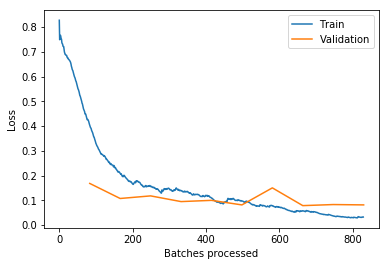

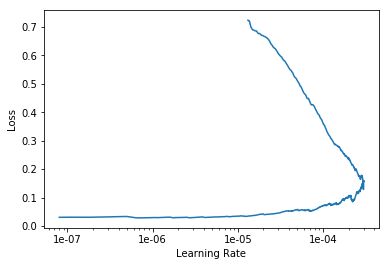

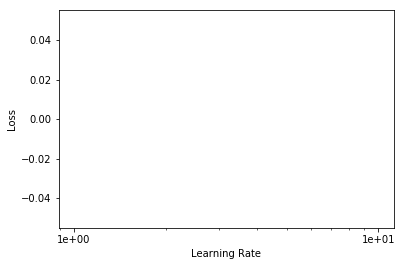

In [51]:

learn.recorder.plot_losses()
learn.recorder.plot(show_momentum=True)
learn.lr_find()
learn.recorder.plot()

In [52]:
learn.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (2657 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: dataset1;

Valid: LabelList (664 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,NORMAL,NORMAL
Path: dataset1;

Test: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: dataset1, model=DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5,callbacks=[SaveModelCallback(learn, every='imrpovement', monitor='f1_score_a')])

/usr/local/lib/python3.6/dist-packages/fastai/callbacks/tracker.py:83: UserWarning: SaveModel every imrpovement is invalid, falling back to "improvement".
  warn(f'SaveModel every {self.every} is invalid, falling back to "improvement".')


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score_a,time
0,0.286155,0.559270,0.289157,0.710843,0.671956,02:34
1,0.311741,0.205309,0.079819,0.920181,0.917600,02:29
2,0.293919,0.300308,0.082831,0.917169,0.830430,02:31
3,0.247971,0.164490,0.045181,0.954819,0.947274,02:34
4,0.190612,0.146508,0.048193,0.951807,0.923808,02:34


Better model found at epoch 0 with f1_score_a value: 0.6719558238983154.
Better model found at epoch 1 with f1_score_a value: 0.9175999760627747.
Better model found at epoch 3 with f1_score_a value: 0.9472739100456238.


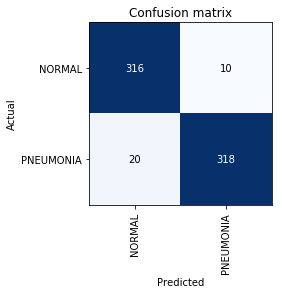

In [0]:

learn.load('bestmodel')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
# learn.load('Res')

In [0]:
# learn.lr_find()
# # learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(20,max_lr=(1e-07),wd=0.25)

In [0]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

In [0]:
# learn.lr_find()

In [0]:
# learn.recorder.plot()

In [0]:
conf=interp.confusion_matrix()
TrueNagitive=conf[0][0]
FalseNegative=conf[0][1]
TruePositive=conf[1][1]
FalsePositive=conf[1][0]
recal=TruePositive/(TruePositive+FalseNegative)
precision=TruePositive/(TruePositive+FalsePositive)
print("Precision of Model =",precision,"Recall of Model ", recal)
f1=2*((precision*recal)/(precision+recal))
print('F1 Score of Model =',f1)

Precision of Model = 0.9408284023668639 Recall of Model  0.9695121951219512
F1 Score of Model = 0.954954954954955
